<a href="https://colab.research.google.com/github/pradul7/Brain_tumour/blob/main/DL_CNN_BrainTumour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.regularizers import l1,l2
from keras.callbacks import EarlyStopping



In [ ]:
train_path = '/content/drive/MyDrive/BrainTumour_data/Training'
x_train = []
y_train = []

categories = ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']
for i in categories:
  folder_path = os.path.join(train_path,i)

  images = os.listdir(folder_path)
  for j in images:
    img_path = os.path.join(folder_path,j)

    img = imread(img_path)
    img_resize = resize(img,(150,150,1))
    x_train.append(img_resize)
    y_train.append(categories.index(i))




In [ ]:
test_path = '/content/drive/MyDrive/BrainTumour_data/Testing'
x_test = []
y_test = []

categories = ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']
for i in categories:
  folder_path = os.path.join(test_path,i)

  images = os.listdir(folder_path)
  for j in images:
    img_path = os.path.join(folder_path,j)

    img = imread(img_path)
    img_resize = resize(img,(150,150,1))
    x_test.append(img_resize)
    y_test.append(categories.index(i))




In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2870, 150, 150, 1), (2870,), (394, 150, 150, 1), (394,))

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(4,activation='softmax'))



In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
final = model.fit(x_train,y_train,batch_size=64,epochs=10,validation_split=0.2)    #,callbacks=[early_stop]

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5062 - loss: 1.2141 - val_accuracy: 0.0000e+00 - val_loss: 1.3480
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6430 - loss: 0.8546 - val_accuracy: 0.0488 - val_loss: 1.5525
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8099 - loss: 0.5021 - val_accuracy: 0.3345 - val_loss: 1.2220
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8727 - loss: 0.3644 - val_accuracy: 0.5627 - val_loss: 0.9275
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9150 - loss: 0.2619 - val_accuracy: 0.0993 - val_loss: 2.6422
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9510 - loss: 0.1567 - val_accuracy: 0.5505 - val_loss: 1.0909
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9764 - loss: 0.0891 - val_accuracy: 0.4233 - val_loss: 1.8384
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9938 - loss: 0.0497 - val_accuracy: 0.1638 - val_l

In [ ]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.8643 - loss: 1.0303


[2.8370048999786377, 0.6954314708709717]

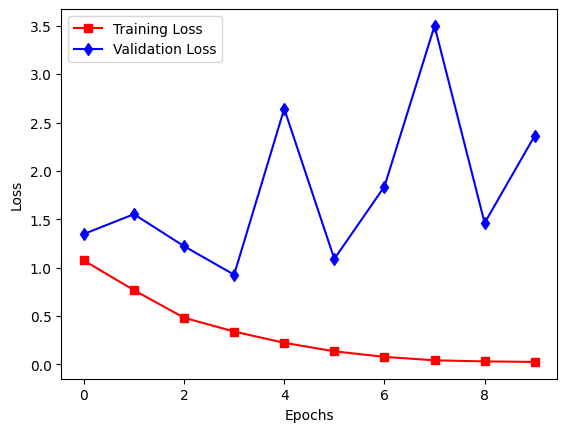

In [ ]:
x1 = final.history['loss']
y1 = final.history['accuracy']

x2 = final.history['val_loss']
y2 = final.history['val_accuracy']

plt.plot(x1,marker='s',color='r',label='Training Loss')
plt.plot(x2,marker='d',color='b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

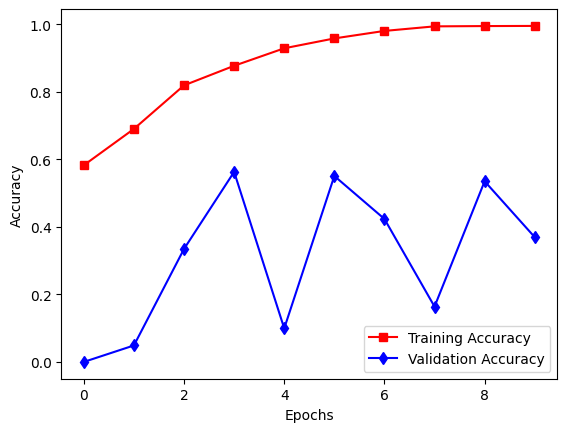

In [ ]:
plt.plot(y1,marker='s',color='r',label='Training Accuracy')
plt.plot(y2,marker='d',color='b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
x_train.shape

(2870, 150, 150, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
pituitary_tumor


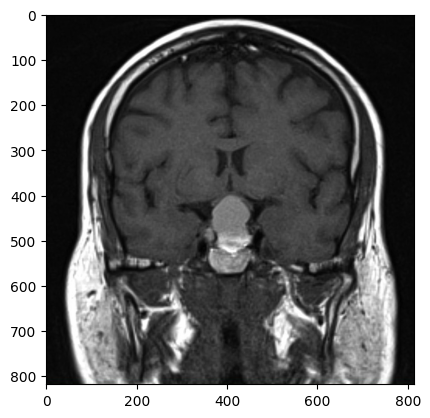

In [ ]:
img = imread('/content/pituitary.JPG')
plt.imshow(img)

img = resize(img,(150,150,1)).reshape(1,150,150,1)
y_pred = model.predict(img)
ind = np.argmax(y_pred)
print(categories[ind])